# Spotify Dataset

The Spotify dataset is a collection of information about songs and audio features. It typically includes the following components:
## 1. Basic Metadata:
- Track Name: Title of the song.
- Artist(s): Name(s) of the performing artist(s).
- Release Year (Year): The year the track was released.
- Duration: Length of the track in milliseconds.
## 2. Audio Features:
- Danceability: How suitable the track is for dancing, based on tempo, rhythm stability, beat strength, etc.
- Energy: The intensity and activity level of the track.
- Valence: The emotional positivity or happiness of the track.
- Explicit: (True or False) indicates whether a track contains explicit content.
- Tempo: The estimated speed of the track in beats per minute (BPM).
- Acousticness: The likelihood of the track being acoustic.
- Instrumentalness: The probability of the track containing no vocals.
- Liveness: The presence of an audience or live performance elements.
- Speechiness: The presence of spoken words in the track.
- Loudness: The overall volume level in decibels.
- Key and Mode: The musical key and mode (major or minor) of the track
- Popularity:(typically between 0 and 100) indicating the popularity of the track on Spotify.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the data:

In [3]:
df = pd.read_csv('Data\data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
print(f'The shape of the dataset is: {df.shape}')

The shape of the dataset is: (170653, 19)


## Checking missing values:

In [5]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

## Checking duplicated rows:

In [6]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


## Checking data types:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

## Checking unique values in each column:

In [8]:
df.nunique()

valence               1733
year                   100
acousticness          4689
artists              34088
danceability          1240
duration_ms          51755
energy                2332
explicit                 2
id                  170653
instrumentalness      5401
key                     12
liveness              1740
loudness             25410
mode                     2
name                133638
popularity             100
release_date         11244
speechiness           1626
tempo                84694
dtype: int64

## Checking statistics of dataset:

In [9]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


##  Define numerical & categorical columns

In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 15 numerical features : ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

We have 4 categorical features : ['artists', 'id', 'name', 'release_date']


## Remove unnecessary columns:

In [11]:
# remove id and release date columns:
df = df.drop(columns=['id','release_date'])
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665


# Exploring Data ( Visualization )

### Top 10 Artists:

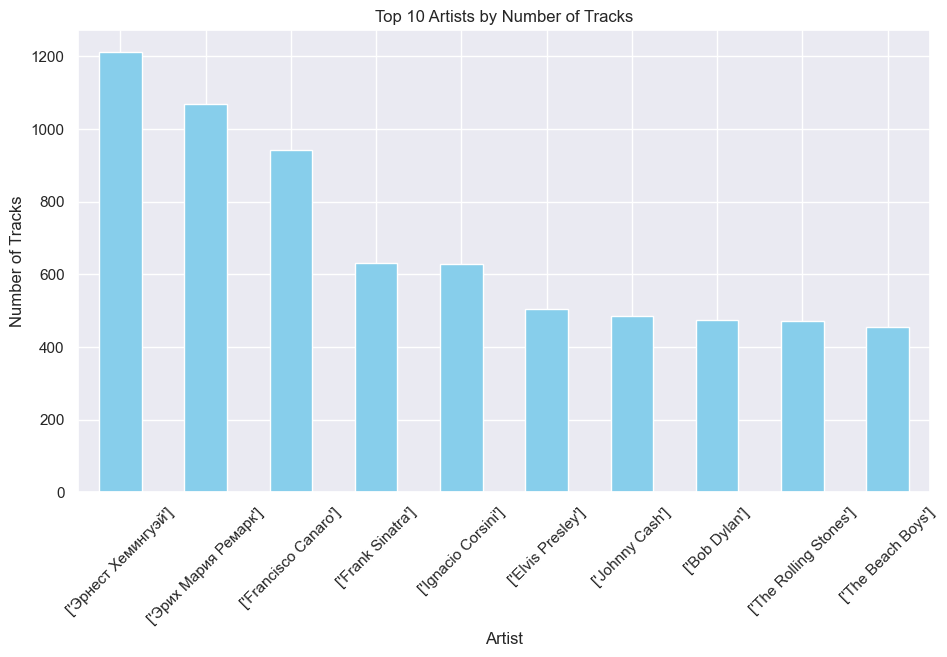

In [53]:
top_artists = df['artists'].value_counts().head(10)
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

### Top 20 Tracks

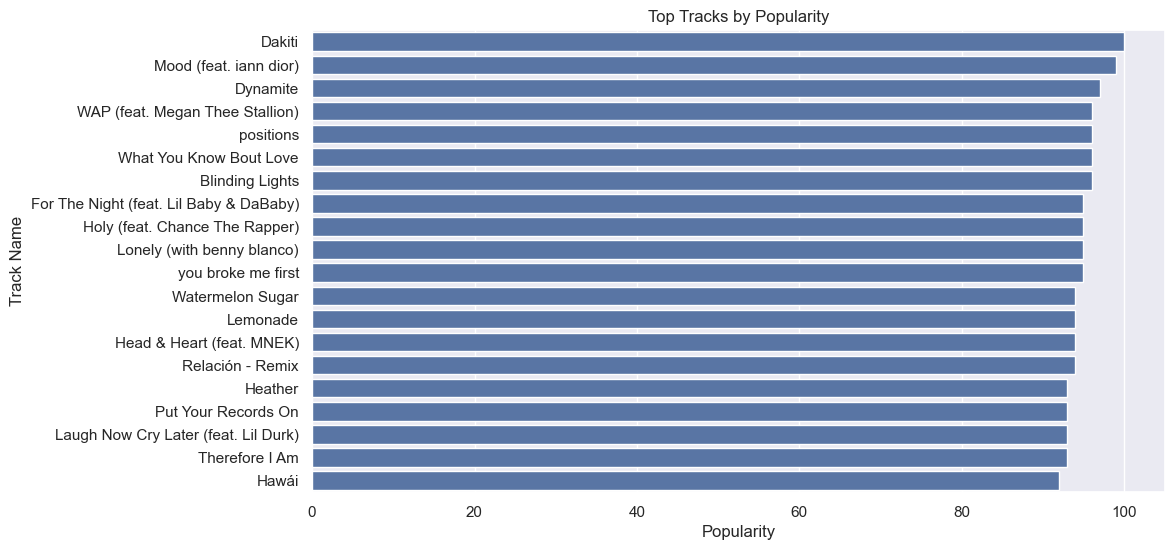

In [ ]:
top_tracks = df.sort_values('popularity', ascending=False).head(20)
sb.barplot(x='popularity', y='name', data=top_tracks, orient='h')
plt.title('Top Tracks by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.show()


### Music Over Time:

In [15]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df['decade'] = df['year'].apply(get_decade)

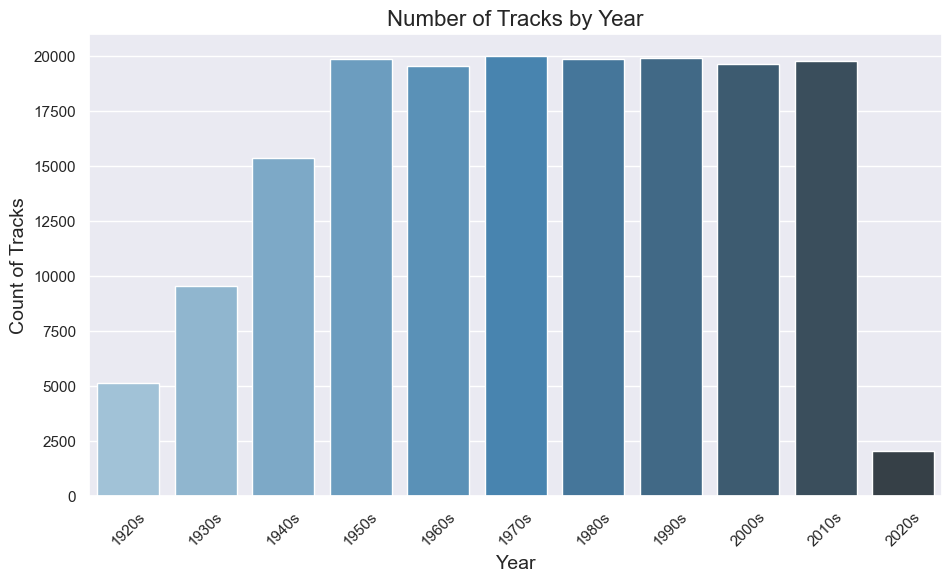

In [ ]:
# Set figure size and style
sb.set(rc={'figure.figsize':(11, 6)})

# Create a countplot for the 'Decade' column
plt.figure(figsize=(11, 6))  # Setting figure size manually (if needed)
ax = sb.countplot(x='decade', data=df, palette="Blues_d")

# Add title and labels
ax.set_title('Number of Tracks by Decade', fontsize=16)
ax.set_xlabel('Decade', fontsize=14)
ax.set_ylabel('Count of Tracks', fontsize=14)


# Display the plot
plt.xticks(rotation=45)
plt.show()

### Trend of Popularity:

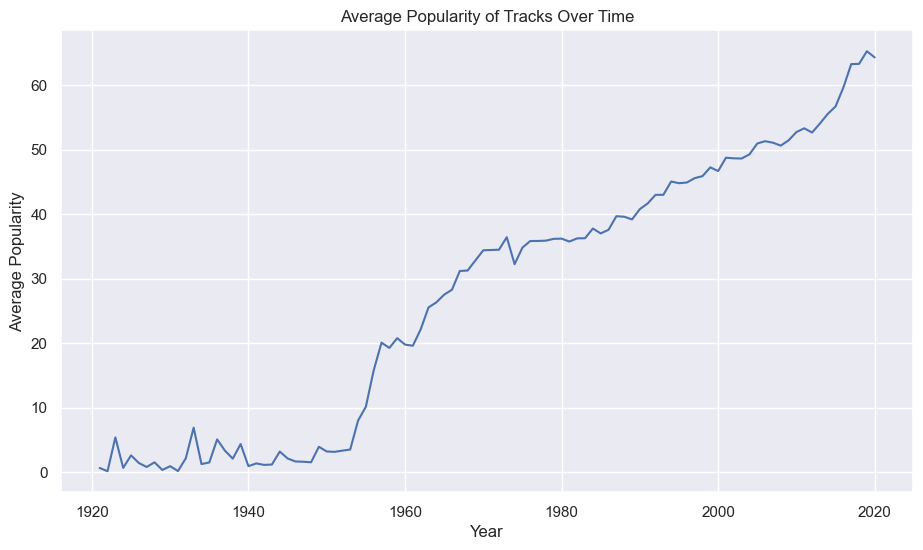

In [21]:
avg_popularity = df.groupby('year')['popularity'].mean()
plt.plot(avg_popularity)
plt.title('Average Popularity of Tracks Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()

### Average Tempo by Year:

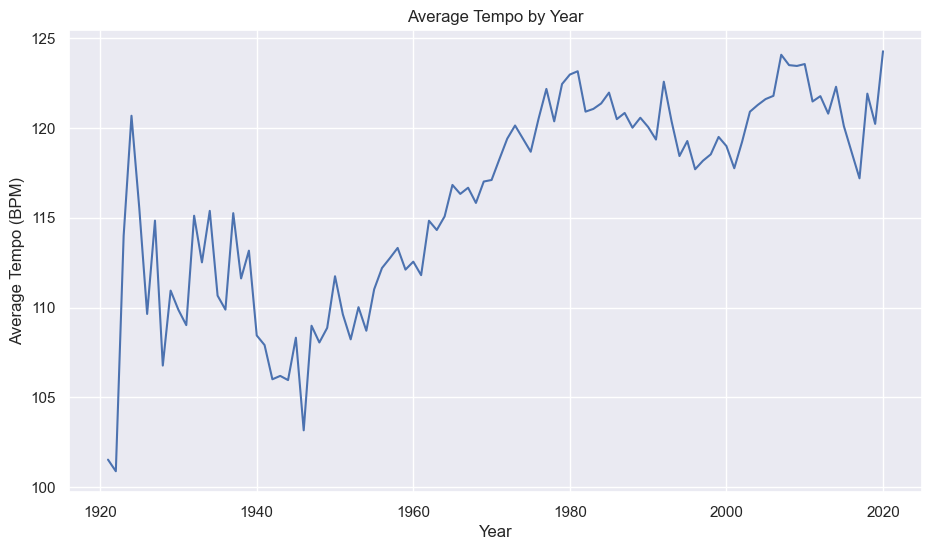

In [29]:
avg_tempo = df.groupby('year')['tempo'].mean()
avg_tempo.plot(kind='line')
plt.title('Average Tempo by Year')
plt.xlabel('Year')
plt.ylabel('Average Tempo (BPM)')
plt.show()

### Audio Features Correlation Heatmap:

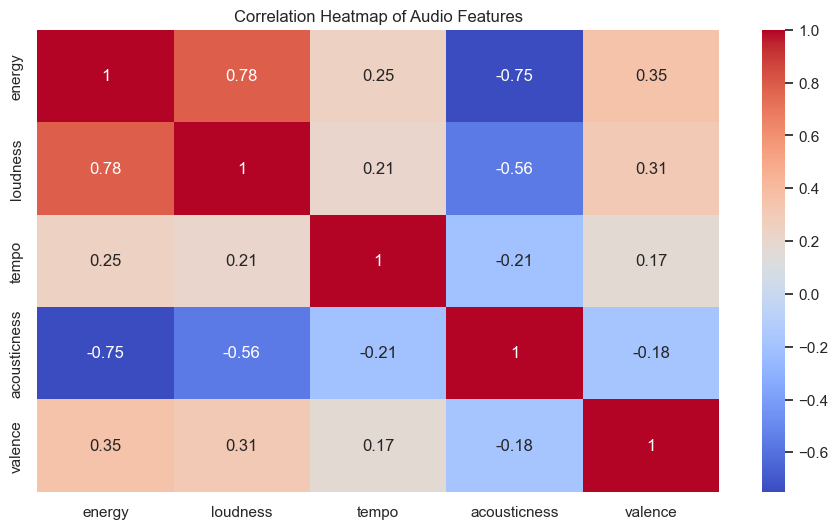

In [45]:
corr = df[['energy', 'loudness', 'tempo', 'acousticness', 'valence']].corr()
sb.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Audio Features')
plt.show()

### Distribution of Valence:

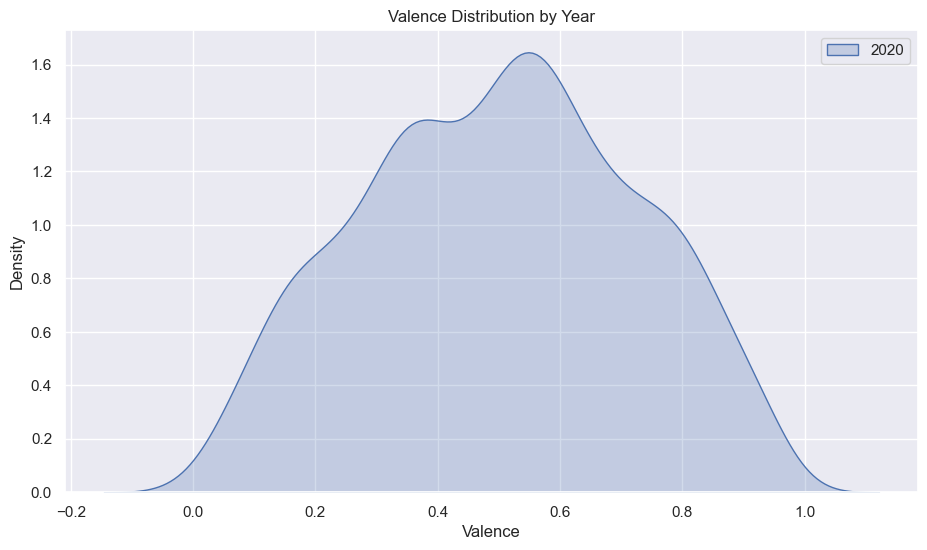

In [ ]:
sb.kdeplot(df[df['year'] == 2020]['valence'], label='2020', shade=True)
plt.title('Valence Distribution by Year')
plt.xlabel('Valence')
plt.ylabel('Density')
plt.legend()
plt.show()

### Feature Correlation with Popularity

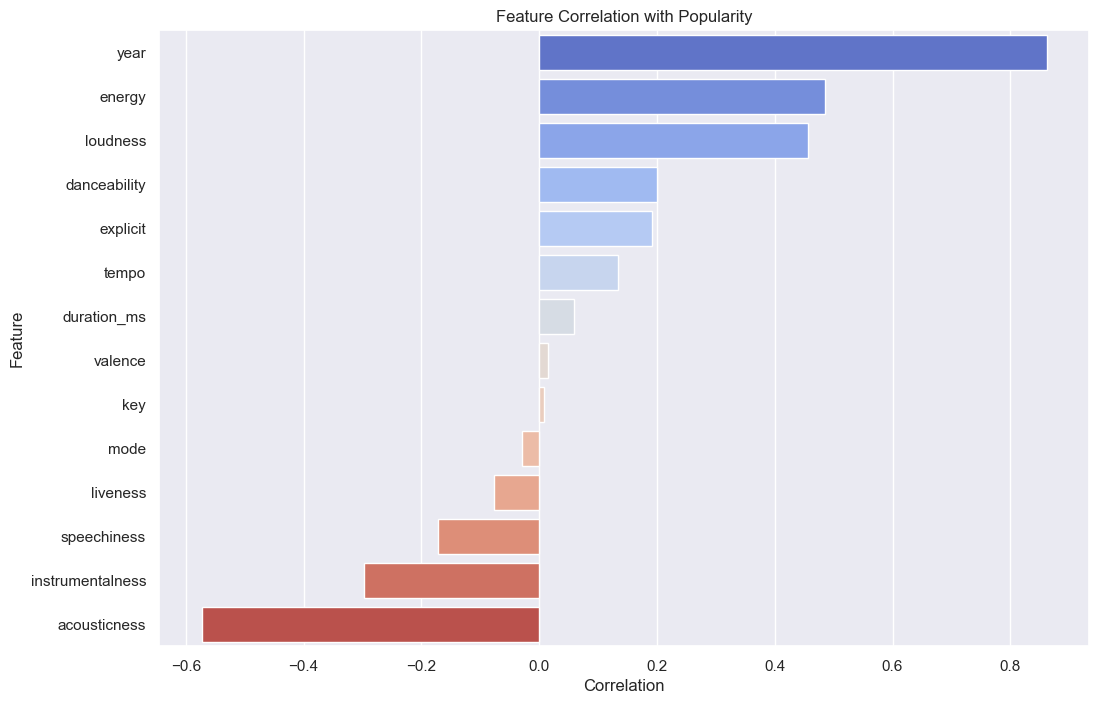

In [54]:
# Define the feature names
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

# Extract the features and target
X = df[feature_names]
y = df['popularity']

# Compute correlations between each feature and the target 'popularity'
correlations = X.corrwith(y)

# Convert correlations to a DataFrame for plotting
corr_df = pd.DataFrame({'Feature': feature_names, 'Correlation': correlations})

# Sort by the absolute value of the correlation for better visualization
corr_df = corr_df.reindex(corr_df['Correlation'].sort_values(ascending=False).index)

# Plot using Seaborn's barplot
plt.figure(figsize=(12, 8))
sb.barplot(x='Correlation', y='Feature', data=corr_df, palette='coolwarm')

plt.title('Feature Correlation with Popularity')
plt.show()